Import Python 2 libraries

In [13]:
import pandas as pd
from sklearn import neural_network, linear_model, cross_validation,metrics,cluster
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pp

Read datafiles

In [14]:
APPLE = pd.read_csv('Data/AAPL.csv')
ADOBE = pd.read_csv('Data/ADBE.csv')
GOOGLE = pd.read_csv('Data/GOOGL.csv')
MICROSOFT = pd.read_csv('Data/MSFT.csv')
NVIDIA = pd.read_csv('Data/NVDA.csv')
SONY = pd.read_csv('Data/SNE.csv')
Globals = ["APPLE", "ADOBE", "GOOGLE", "MICROSOFT", "NVIDIA", "SONY"]

Separate files by years

In [15]:
APPLE11 = pd.read_csv('Data/2011/AAPL.csv')
ADOBE11 = pd.read_csv('Data/2011/ADBE.csv')
GOOGLE11 = pd.read_csv('Data/2011/GOOGL.csv')
MICROSOFT11 = pd.read_csv('Data/2011/MSFT.csv')
NVIDIA11 = pd.read_csv('Data/2011/NVDA.csv')
SONY11 = pd.read_csv('Data/2011/SNE.csv')
dat11 = ["APPLE11", "ADOBE11", "GOOGLE11", "MICROSOFT11", "NVIDIA11", "SONY11"]

APPLE12 = pd.read_csv('Data/2012/AAPL.csv')
ADOBE12 = pd.read_csv('Data/2012/ADBE.csv')
GOOGLE12 = pd.read_csv('Data/2012/GOOGL.csv')
MICROSOFT12 = pd.read_csv('Data/2012/MSFT.csv')
NVIDIA12 = pd.read_csv('Data/2012/NVDA.csv')
SONY12 = pd.read_csv('Data/2012/SNE.csv')
dat12 = ["APPLE12", "ADOBE12", "GOOGLE12", "MICROSOFT12", "NVIDIA12", "SONY12"]

APPLE13 = pd.read_csv('Data/2013/AAPL.csv')
ADOBE13 = pd.read_csv('Data/2013/ADBE.csv')
GOOGLE13 = pd.read_csv('Data/2013/GOOGL.csv')
MICROSOFT13 = pd.read_csv('Data/2013/MSFT.csv')
NVIDIA13 = pd.read_csv('Data/2013/NVDA.csv')
SONY13 = pd.read_csv('Data/2013/SNE.csv')
dat13 = ["APPLE13", "ADOBE13", "GOOGLE13", "MICROSOFT13", "NVIDIA13", "SONY13"]

APPLE14 = pd.read_csv('Data/2014/AAPL.csv')
ADOBE14 = pd.read_csv('Data/2014/ADBE.csv')
GOOGLE14 = pd.read_csv('Data/2014/GOOGL.csv')
MICROSOFT14 = pd.read_csv('Data/2014/MSFT.csv')
NVIDIA14 = pd.read_csv('Data/2014/NVDA.csv')
SONY14 = pd.read_csv('Data/2014/SNE.csv')
dat14 = ["APPLE14", "ADOBE14", "GOOGLE14", "MICROSOFT14", "NVIDIA14", "SONY14"]

APPLE15 = pd.read_csv('Data/2015/AAPL.csv')
ADOBE15 = pd.read_csv('Data/2015/ADBE.csv')
GOOGLE15 = pd.read_csv('Data/2015/GOOGL.csv')
MICROSOFT15 = pd.read_csv('Data/2015/MSFT.csv')
NVIDIA15 = pd.read_csv('Data/2015/NVDA.csv')
SONY15 = pd.read_csv('Data/2015/SNE.csv')
dat15 = ["APPLE15", "ADOBE15", "GOOGLE15", "MICROSOFT15", "NVIDIA15", "SONY15"]

APPLE16 = pd.read_csv('Data/2016/AAPL.csv')
ADOBE16 = pd.read_csv('Data/2016/ADBE.csv')
GOOGLE16 = pd.read_csv('Data/2016/GOOGL.csv')
MICROSOFT16 = pd.read_csv('Data/2016/MSFT.csv')
NVIDIA16 = pd.read_csv('Data/2016/NVDA.csv')
SONY16 = pd.read_csv('Data/2016/SNE.csv')
dat16 = ["APPLE16", "ADOBE16", "GOOGLE16", "MICROSOFT16", "NVIDIA16", "SONY16"]


Function draws grafic of string:s from dataframe string:name

In [16]:
def draw(name, s):
    pp.title(name)
    df = eval(name)
    pp.xlabel("date")
    pp.ylabel(s)
    pp.plot(pd.to_datetime(df["date"]), df[s])
    pp.show()


Drawing part

In [ ]:
for name in Globals:
    draw(name, "close")

In [17]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     print(data,n_in,n_out)
    n_vars = 1 if type(data) is list else list(data.columns)
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (j, i)) for j in n_vars]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (j)) for j in n_vars]
        else:
            names += [('%s(t+%d)' % (j, i)) for j in n_vars]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [18]:
window=4
var=["open","close","high","low"]
future=3
train=APPLE11
test=APPLE12

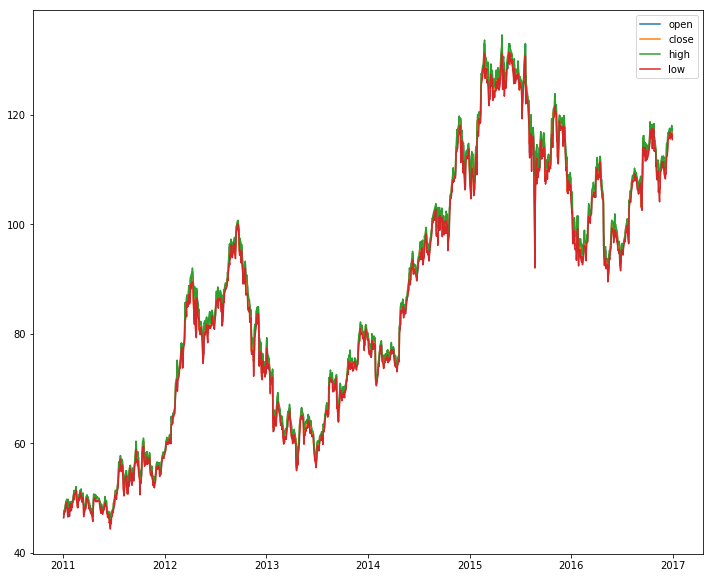

In [19]:
pp.figure(figsize=(12,10))
pp.plot(pd.to_datetime(APPLE["date"]), APPLE[var])

pp.legend(var)

In [20]:
def get_X_y(data,window,future):
    raw=series_to_supervised(data[var],window,future)
    X=raw[raw.columns[:len(var)*window]]
    y=raw[raw.columns[len(var)*window:]]
#     print(X.head(5),y.head(5))
    # reshape input to be 3D [samples, timesteps, features]
    return X.values.reshape((X.shape[0], 1, X.shape[1])),y.values.reshape((y.shape[0], 1, y.shape[1]))

In [21]:
raw=series_to_supervised(APPLE[var],5,3)
raw[["open(t-5)","close(t-5)","low(t-5)","high(t-5)","open(t+2)","close(t+2)","high(t+2)","low(t+2)"]].corr()

,open(t-5),close(t-5),low(t-5),high(t-5),open(t+2),close(t+2),high(t+2),low(t+2)
open(t-5),1.000000,0.998827,0.999416,0.999484,0.988091,0.989131,0.988940,0.988543
close(t-5),0.998827,1.000000,0.999481,0.999467,0.987229,0.988249,0.988067,0.987719
low(t-5),0.999416,0.999481,1.000000,0.999264,0.986814,0.987898,0.987638,0.987389
high(t-5),0.999484,0.999467,0.999264,1.000000,0.988642,0.989609,0.989482,0.989030
open(t+2),0.988091,0.987229,0.986814,0.988642,1.000000,0.998834,0.999487,0.999421
close(t+2),0.989131,0.988249,0.987898,0.989609,0.998834,1.000000,0.999470,0.999485
high(t+2),0.988940,0.988067,0.987638,0.989482,0.999487,0.999470,1.000000,0.999272
low(t+2),0.988543,0.987719,0.987389,0.989030,0.999421,0.999485,0.999272,1.000000


In [92]:
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
from keras.models import Sequential
window=5
var=["open","close","high","low"]
future=3
train=APPLE11
test=APPLE12

def try_model(train,test):
    print(window,future)
    X_train,y_train=get_X_y(train,window,future)
    X_test,y_test=get_X_y(test,window,future)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    model = Sequential()
#     model.add(LSTM(100,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(SimpleRNN(512,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(SimpleRNN(512,return_sequences=True))
    # model.add(Dropout(0.5))

    # model.add(GRU(15))
    
    model.add(LSTM(87,return_sequences=True))
#     model.add(GRU(units=512,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))

    
#     model.add(SimpleRNN(512,return_sequences=True))
    model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, X_train.shape[0],)))
#     model.add(LSTM(100,return_sequences=True))
#     model.add(Dropout(0.5))
    model.add(Dense(future*len(var)))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.summary()
    
    history = model.fit(X_train, y_train, epochs=200, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
    pp.plot(model.predict(X_test))
    return history

5 3
(1251, 1, 20) (1251, 1, 12) (245, 1, 20) (245, 1, 12)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_18 (SimpleRNN)    (None, 1, 512)            272896    
_________________________________________________________________
lstm_23 (LSTM)               (None, 1, 87)             208800    
_________________________________________________________________
gru_21 (GRU)                 (None, 1, 512)            921600    
_________________________________________________________________
dense_24 (Dense)             (None, 1, 12)             6156      
Total params: 1,409,452
Trainable params: 1,409,452
Non-trainable params: 0
_________________________________________________________________
Train on 1251 samples, validate on 245 samples
Epoch 1/200
 - 6s - loss: 6991.3561 - val_loss: 9432.2959
Epoch 2/200
 - 1s - loss: 5332.9374 - val_loss: 6898.9699
Epoch 3/200
 - 1s - loss: 3486.4275 - val_l

 - 1s - loss: 619.8128 - val_loss: 460.4260
Epoch 128/200
 - 1s - loss: 619.8160 - val_loss: 460.4234
Epoch 129/200
 - 1s - loss: 619.8192 - val_loss: 460.4213
Epoch 130/200
 - 1s - loss: 619.8223 - val_loss: 460.4197
Epoch 131/200
 - 1s - loss: 619.8253 - val_loss: 460.4173
Epoch 132/200
 - 1s - loss: 619.8284 - val_loss: 460.4152
Epoch 133/200
 - 1s - loss: 619.8312 - val_loss: 460.4128
Epoch 134/200
 - 1s - loss: 619.8342 - val_loss: 460.4113
Epoch 135/200
 - 1s - loss: 619.8369 - val_loss: 460.4096
Epoch 136/200
 - 1s - loss: 619.8397 - val_loss: 460.4081
Epoch 137/200
 - 1s - loss: 619.8422 - val_loss: 460.4058
Epoch 138/200
 - 1s - loss: 619.8449 - val_loss: 460.4044
Epoch 139/200
 - 1s - loss: 619.8474 - val_loss: 460.4023
Epoch 140/200
 - 1s - loss: 619.8500 - val_loss: 460.4011
Epoch 141/200
 - 1s - loss: 619.8523 - val_loss: 460.3995
Epoch 142/200
 - 1s - loss: 619.8548 - val_loss: 460.3982
Epoch 143/200
 - 1s - loss: 619.8571 - val_loss: 460.3972
Epoch 144/200
 - 1s - loss: 

ValueError: x and y can be no greater than 2-D, but have shapes (245,) and (245, 1, 12)

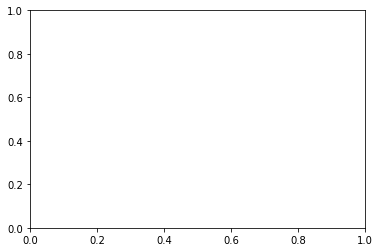

In [93]:
data=APPLE11.append(APPLE12).append(APPLE13).append(APPLE14).append(APPLE15)
h=try_model(data,APPLE16)


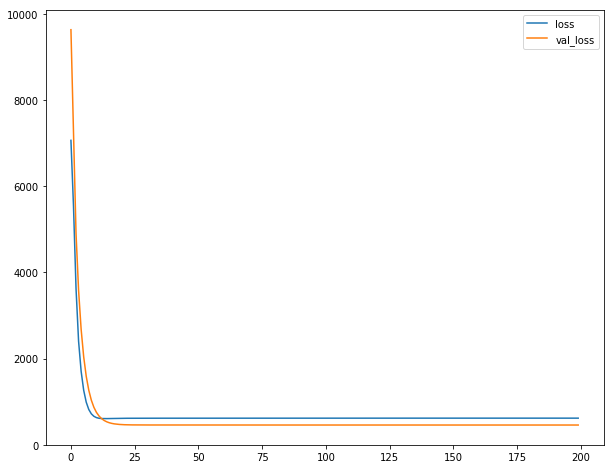

In [91]:
pp.figure(figsize=(10,8))
pp.plot(h.history["loss"])
pp.plot(h.history["val_loss"])
pp.legend(["loss","val_loss"])

In [ ]:
ohuitelnie_histories=[]
for i in range(512,600):
        ohuitelnie_histories.append((i,try_model(APPLE11,APPLE12,var,4,3,i)))

In [ ]:
oh1=ohuitelnie_histories

In [ ]:
l=[i[2].history["val_loss"][-1] for i in oh1]
l.index(min(l))

In [ ]:
l=[i[-1].history["loss"][-1] for i in ohuitelnie_histories]
l.index(min(l))

In [ ]:
list(range(40,100))[47]

In [ ]:
l=[i[-1].history["loss"][-1] for i in ohuitelnie_histories]
range(1,101)[l.index(min(l))]

In [ ]:
pp.plot([i[-1].history["loss"][-1] for i in ohuitelnie_histories])

In [ ]:
pp.plot(ohuitelnie_histories[4][-1].history["loss"])

In [ ]:
h=try_model(APPLE11,APPLE12,var,20,7,87)

In [ ]:
pp.plot(h.history["loss"])

In [ ]:
import statsmodels.api as sm

In [ ]:
l=[list(SONY11["open"].values)]
l.append(list(range(len(SONY11["open"].values))))
print(l)